In [272]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Q3.1

In [96]:
def total_char(train_files, ):
    total_docs = len(train_files)
    total_counts = 0
    for files in train_files:
        with open(files, 'r', encoding='utf-8') as f:
            for line in f:
                for char in line:
                    if char in 'abcdefghijklmnopqrstuvwxyz ':
                        total_counts += 1
    return total_counts

train_files_e = [f"languageID/e{i}.txt" for i in range(10)]
train_files_j = [f"languageID/j{i}.txt" for i in range(10)]
train_files_s = [f"languageID/s{i}.txt" for i in range(10)]


alpha = 0.5
languages = ['e', 'j', 's']
counts=np.array([total_char(train_files_e),total_char(train_files_j),total_char(train_files_s)])

for i in range(len(languages)):
    c=(counts[i] + alpha) / (sum(counts) + alpha * len(languages))
    print(languages[i],':',c)
    
counts=np.log(counts)

e : 0.3314335192958997
j : 0.3133925929173471
s : 0.3551738877867532


# Q3.2

In [154]:
def char_to_index(ch):
    if ch == ' ':
        return 26
    return ord(ch) - ord('a')

def conditional_probability(train_files, prob=True ):
    total_docs = len(train_files)
    char_counts = np.zeros( 27,dtype='int')
    for i in range(len(train_files)):
        files=train_files[i]
        with open(files, 'r', encoding='utf-8') as f:
            for line in f:
                for char in line:
                    if char in 'abcdefghijklmnopqrstuvwxyz ':
                        char_index = char_to_index(char)
                        char_counts[char_index] += 1
    alpha=0.5
    V = 27  
    if prob:
        total_english_chars = np.sum(char_counts)
        theta_e = (char_counts + alpha) / (total_english_chars + alpha * V)

        return theta_e
    else:
        return char_counts

train_files = [f"languageID/e{i}.txt" for i in range(10)]
theta_e = np.log(conditional_probability(train_files))

print("Theta for English:", ['{:.5f}'.format(p) for p in np.exp(theta_e)])

Theta for English: ['0.06017', '0.01113', '0.02151', '0.02197', '0.10537', '0.01893', '0.01748', '0.04722', '0.05541', '0.00142', '0.00373', '0.02898', '0.02052', '0.05792', '0.06446', '0.01675', '0.00056', '0.05382', '0.06618', '0.08013', '0.02666', '0.00928', '0.01550', '0.00116', '0.01384', '0.00063', '0.17925']


# Q3.3

In [155]:
train_files = [f"languageID/j{i}.txt" for i in range(10)]
theta_j = np.log(conditional_probability(train_files))

print("Theta for Japanese:", ['{:.5f}'.format(p) for p in np.exp(theta_j)])

Theta for Japanese: ['0.13177', '0.01087', '0.00549', '0.01723', '0.06020', '0.00388', '0.01401', '0.03176', '0.09703', '0.00234', '0.05741', '0.00143', '0.03980', '0.05671', '0.09116', '0.00087', '0.00010', '0.04280', '0.04217', '0.05699', '0.07062', '0.00024', '0.01974', '0.00003', '0.01415', '0.00772', '0.12345']


In [156]:
train_files = [f"languageID/s{i}.txt" for i in range(10)]
theta_s = np.log(conditional_probability(train_files))

print("Theta for Spanish:", ['{:.5f}'.format(p) for p in np.exp(theta_s)])

Theta for Spanish: ['0.10456', '0.00823', '0.03753', '0.03975', '0.11381', '0.00860', '0.00718', '0.00453', '0.04986', '0.00663', '0.00028', '0.05294', '0.02581', '0.05418', '0.07249', '0.02427', '0.00768', '0.05930', '0.06577', '0.03561', '0.03370', '0.00589', '0.00009', '0.00250', '0.00786', '0.00268', '0.16826']


# Q3.4

In [157]:
test_file = ["languageID/e10.txt"]
bow_vector = conditional_probability(test_file, prob=False )

print("Bag-of-words vector for e10.txt:")
for i,char in enumerate('abcdefghijklmnopqrstuvwxyz '):
    print(f"{char}: {bow_vector[i]}",end=", ")


Bag-of-words vector for e10.txt:
a: 164, b: 32, c: 53, d: 57, e: 311, f: 55, g: 51, h: 140, i: 140, j: 3, k: 6, l: 85, m: 64, n: 139, o: 182, p: 53, q: 3, r: 141, s: 186, t: 225, u: 65, v: 31, w: 47, x: 4, y: 38, z: 2,  : 498, 

# Q3.5

In [158]:
theta=np.array([theta_e,theta_j,theta_s])
likelihood=[]
for i in range(len(languages)):
    likelihood.append(sum(bow_vector*theta[i]))
print(likelihood)

[-7841.865447060635, -8771.433079075032, -8467.282044010557]


# Q3.6

In [159]:
likelihood+counts

array([-7832.24173955, -8761.86534402, -8457.58915404])

# Q3.7

In [160]:
def predict(file):
    bow_vector = conditional_probability(file, prob=False )
    likelihood=[]
    for i in range(len(languages)):
        likelihood.append(sum(bow_vector*theta[i]))
    p=np.argmax(likelihood+counts)
    return languages[p]
    

Text(0, 0.5, 'Predicted Label')

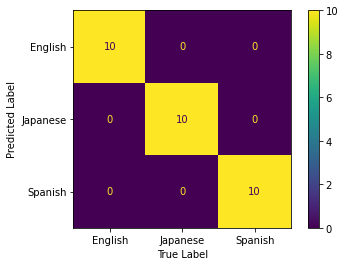

In [176]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
test_files = np.array([
    [f"languageID/e{i}.txt" for i in range(10, 20)],
    [f"languageID/j{i}.txt" for i in range(10, 20)],
    [f"languageID/s{i}.txt" for i in range(10, 20)]]).flatten()

predict_lab=[]
true_lab= np.array([
    [f"e" for i in range(10, 20)],
    [f"j" for i in range(10, 20)],
    [f"s" for i in range(10, 20)]]).flatten()
for i in range(len(test_files)):
    predict_lab.append(predict([test_files[i]]))

cm = confusion_matrix(true_lab, predict_lab, labels=["e", "j", "s"]).T
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["English", "Japanese", "Spanish"])
plot = disp.plot()
plot.ax_.set_xlabel('True Label')
plot.ax_.set_ylabel('Predicted Label')

# Q4.2

In [236]:
# installing  pip install Pillow==9.0.0  
#pip3 install functorch 

In [238]:
import torch
from torchvision import datasets, transforms

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

trainset = datasets.MNIST('MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = datasets.MNIST('MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)


100%|███████████████████████████████████████████████████████| 9912422/9912422 [00:00<00:00, 63038392.86it/s]


Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



100%|███████████████████████████████████████████████████████████| 28881/28881 [00:00<00:00, 16125624.84it/s]

Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw




100%|███████████████████████████████████████████████████████| 1648877/1648877 [00:00<00:00, 53009959.81it/s]


Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



100%|██████████████████████████████████████████████████████████████| 4542/4542 [00:00<00:00, 7151099.39it/s]


Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



Epoch 1/10, Loss: 1.9215
Epoch 2/10, Loss: 1.0270
Epoch 3/10, Loss: 0.5941
Epoch 4/10, Loss: 0.7074
Epoch 5/10, Loss: 0.4063
Epoch 6/10, Loss: 0.4475
Epoch 7/10, Loss: 0.3593
Epoch 8/10, Loss: 0.2053
Epoch 9/10, Loss: 0.2413
Epoch 10/10, Loss: 0.1206
Avearge test Loss: 0.3541280058342722


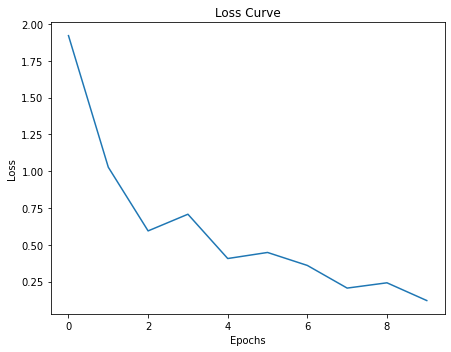

In [322]:
d = 28 * 28  
d1 = 300  
k = 10  
learning_rate = 0.008
epochs = 10

np.random.seed(42)
W1 = np.random.randn(d1, d) * 0.01
W2 = np.random.randn(k, d1) * 0.01

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def softmax(z):
    e_z = np.exp(z - np.max(z, axis=-1, keepdims=True))
    return e_z / e_z.sum(axis=-1, keepdims=True)

losses = []
accuracies = []
for epoch in range(epochs):
    for images, labels in trainloader:
        X_batch = images.view(-1, 28 * 28).numpy()
        y_batch = np.eye(k)[labels.numpy()]

        # Forward pass
        z1 = np.dot(W1, X_batch.T)
        h = sigmoid(z1)
        z2 = np.dot(W2, h)
        y_hat = softmax(z2.T)

        # Backward pass
        dz2 = y_hat - y_batch
        dW2 = np.dot(dz2.T, h.T) / X_batch.shape[0]
        dh = np.dot(dz2, W2)
        dz1 = dh * h.T * (1 - h.T)  # Transpose h to match the shape of dh
        dW1 = np.dot(dz1.T, X_batch) / X_batch.shape[0]

        # Update weights
        W1 -= learning_rate * dW1
        W2 -= learning_rate * dW2

    # Compute loss and accuracy for this epoch
    z1 = np.dot(W1, X_batch.T)
    h = sigmoid(z1)
    z2 = np.dot(W2, h)
    y_hat = softmax(z2.T)
    loss = -np.mean(np.sum(y_batch * np.log(y_hat), axis=1))
    losses.append(loss)
    
    print(f'Epoch {epoch+1}/{epochs}, Loss: {loss:.4f}')

# Evaluate on test set
test_losses = []
for images, labels in testloader:
    X_batch = images.view(-1, 28 * 28).numpy()
    y_batch = np.eye(k)[labels.numpy()]

    z1 = np.dot(W1, X_batch.T)
    h = sigmoid(z1)
    z2 = np.dot(W2, h)
    y_hat = softmax(z2.T)

    loss = -np.mean(np.sum(y_batch * np.log(y_hat), axis=1))
    test_losses.append(loss)

print('Avearge test Loss:',np.mean(test_losses))

# Plotting
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(losses)
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()

# Q4.3

Epoch 1/10, Loss: 1.8243
Epoch 2/10, Loss: 0.9638
Epoch 3/10, Loss: 0.6514
Epoch 4/10, Loss: 0.5298
Epoch 5/10, Loss: 0.4663
Epoch 6/10, Loss: 0.4276
Epoch 7/10, Loss: 0.4015
Epoch 8/10, Loss: 0.3819
Epoch 9/10, Loss: 0.3670
Epoch 10/10, Loss: 0.3553
Avearge test Loss: 0.3350523856415111


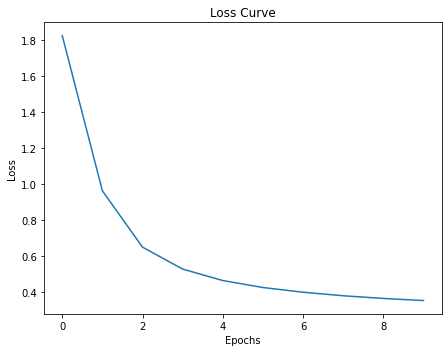

In [311]:
import torch
import torch.nn as nn
import torch.optim as optim

class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 300)
        self.fc2 = nn.Linear(300, 10)
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.fc1(x)
        x = self.sigmoid(x)
        x = self.fc2(x)
        x = self.softmax(x)
        return x

# Initialize the model, loss function, and optimizer
model = SimpleNN()
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.008)

# Training the model
epochs = 10
train_losses = []
for epoch in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()

    train_losses.append(running_loss / len(trainloader))
    print(f'Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(trainloader):.4f}')

# Evaluate the model on the test set
model.eval()
test_loss = 0
with torch.no_grad():
    for images, labels in testloader:
        outputs = model(images)
        loss = criterion(outputs, labels)
        test_loss += loss.item()

print('Avearge test Loss:', test_loss / len(testloader))

# Plotting
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses)
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()


# 4.4

## a)

Initial W1: tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
Initial W2: tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
Epoch 1/10, Loss: 2.3033
Epoch 2/10, Loss: 2.3031
Epoch 3/10, Loss: 2.3032
Epoch 4/10, Loss: 2.3026
Epoch 5/10, Loss: 2.3018
Epoch 6/10, Loss: 2.2917
Epoch 7/10, Loss: 2.1231
Epoch 8/10, Loss: 1.8556
Epoch 9/10, Loss: 1.5944
Epoch 10/10, Loss: 1.3401
Avearge test Loss: 1.2446870982267295


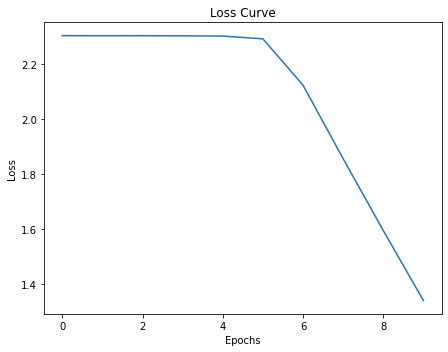

In [319]:
import torch
import torch.nn as nn
import torch.optim as optim

class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 300)
        self.fc2 = nn.Linear(300, 10)
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.LogSoftmax(dim=1)
        nn.init.zeros_(self.fc1.weight)
        nn.init.zeros_(self.fc2.weight)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.fc1(x)
        x = self.sigmoid(x)
        x = self.fc2(x)
        x = self.softmax(x)
        return x

# Initialize the model, loss function, and optimizer
model = SimpleNN()
print("Initial W1:", model.fc1.weight.data)
print("Initial W2:", model.fc2.weight.data)
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.008)

# Training the model
epochs = 10
train_losses0 = []
for epoch in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()

    train_losses0.append(running_loss / len(trainloader))
    print(f'Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(trainloader):.4f}')

# Evaluate the model on the test set
model.eval()
test_loss = 0
with torch.no_grad():
    for images, labels in testloader:
        outputs = model(images)
        loss = criterion(outputs, labels)
        test_loss += loss.item()

print('Avearge test Loss:', test_loss / len(testloader))

# Plotting
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses0)
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()


## b)

Initial W1: tensor([[ 0.6856, -0.5065, -0.6712,  ..., -0.7620,  0.7769,  0.9063],
        [ 0.7130,  0.9305, -0.7645,  ...,  0.9206, -0.5757,  0.6942],
        [-0.6219,  0.1091, -0.4413,  ...,  0.0624,  0.0491,  0.3404],
        ...,
        [-0.7169, -0.1352,  0.6583,  ...,  0.5451, -0.3535,  0.5189],
        [ 0.8476, -0.4662,  0.3118,  ..., -0.2647,  0.8110,  0.1925],
        [-0.6550, -0.0896, -0.1205,  ...,  0.0261,  0.9596, -0.6494]])
Initial W2: tensor([[ 0.0970, -0.5642, -0.0389,  ..., -0.9505,  0.7602, -0.4898],
        [-0.5323,  0.4166, -0.0654,  ..., -0.6380, -0.0271,  0.0897],
        [-0.2938,  0.2047,  0.5879,  ...,  0.5390,  0.0137, -0.3890],
        ...,
        [-0.6784,  0.0111,  0.8304,  ..., -0.2172, -0.8576,  0.3824],
        [ 0.5838,  0.3433,  0.3706,  ..., -0.6360, -0.9898, -0.3635],
        [ 0.8005, -0.3154,  0.2979,  ...,  0.3704,  0.1702, -0.0550]])
Epoch 1/10, Loss: 2.7797
Epoch 2/10, Loss: 1.1502
Epoch 3/10, Loss: 0.8878
Epoch 4/10, Loss: 0.7635
Epoch 5/

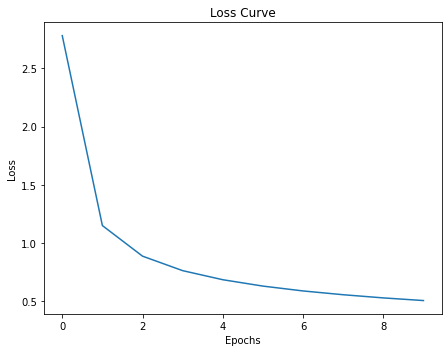

In [320]:
import torch
import torch.nn as nn
import torch.optim as optim

class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 300)
        self.fc2 = nn.Linear(300, 10)
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.LogSoftmax(dim=1)
        nn.init.uniform_(self.fc1.weight, -1, 1)
        nn.init.uniform_(self.fc2.weight, -1, 1)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.fc1(x)
        x = self.sigmoid(x)
        x = self.fc2(x)
        x = self.softmax(x)
        return x

# Initialize the model, loss function, and optimizer
model = SimpleNN()
print("Initial W1:", model.fc1.weight.data)
print("Initial W2:", model.fc2.weight.data)
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.008)

# Training the model
epochs = 10
train_losses_ran = []
for epoch in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()

    train_losses_ran.append(running_loss / len(trainloader))
    print(f'Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(trainloader):.4f}')

# Evaluate the model on the test set
model.eval()
test_loss = 0
with torch.no_grad():
    for images, labels in testloader:
        outputs = model(images)
        loss = criterion(outputs, labels)
        test_loss += loss.item()

print('Avearge test Loss:', test_loss / len(testloader))

# Plotting
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses_ran)
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()


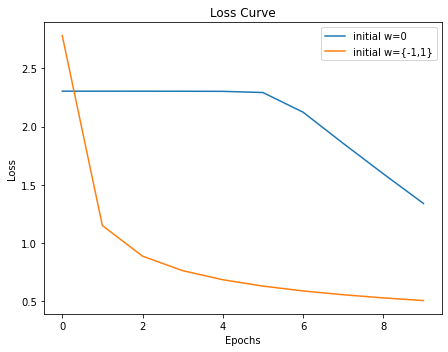

In [321]:
# Plotting
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses0,label='initial w=0')
plt.plot(train_losses_ran,label='initial w={-1,1}')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

# test

torch.Size([64, 1, 28, 28])


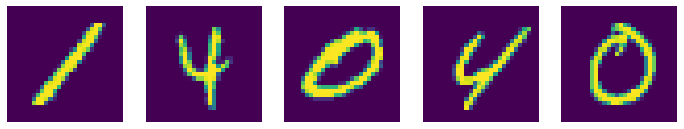

In [288]:

def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.5])
        std = np.array([0.5])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax

# Get one batch of training images
# Get one batch of training images
dataiter = iter(testloader)
images, labels = next(dataiter)  # Use next function here
print(images.shape)
images = images[:5]

# Show images
fig, axes = plt.subplots(figsize=(12, 4), ncols=5)
for ii in range(5):
    ax = axes[ii]
    imshow(images[ii], ax=ax, normalize=True)

plt.show()

